In [169]:
%load_ext autoreload
%autoreload 2
from src.util import utilities as util
from src.data import image_processor as ip

import cv2
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


../data/raw/image_uploads/2022-01-20-1e1a1b8c-3b4e-4c90-ab21-058c23b34b89.png


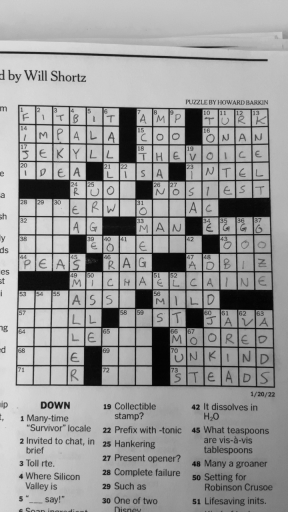

In [212]:
#image = ip.load_image("../data/raw/image_uploads/2021-11-30-2d4a364a-9008-4c2d-8889-e28544fe7315.png")
#image = ip.load_image("../data/raw/image_uploads/2022-01-04-869bb4c6-dd13-40bf-a257-d253fa01a575.png")
image = ip.load_image("../data/raw/image_uploads/2022-01-20-1e1a1b8c-3b4e-4c90-ab21-058c23b34b89.png")
util.showarray(image, scale_factor=.4)

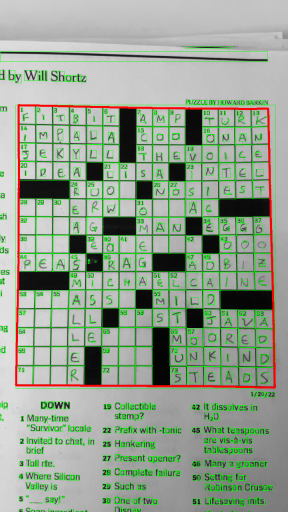

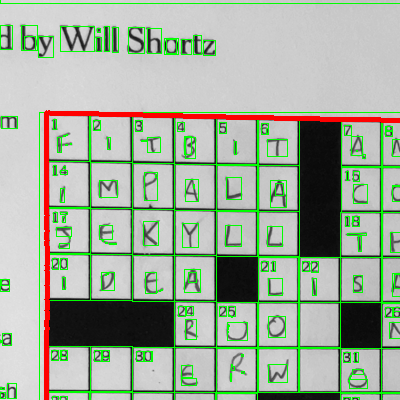

In [213]:
# let's identify the grid and crop it out

max_contour,image_contours = ip.__find_grid(image)

util.showarray(image_contours, scale_factor=.4)
util.showarray(image_contours, crop=(0,150,400,400))

In [214]:
# find the corners of our crossword grid
corners = ip.__find_corners(max_contour)
print(corners)

[[ 46 262]
 [ 39 962]
 [686 969]
 [670 271]]


In [215]:
# find the max width/height
dimensions = ip.__calculate_dimensions(corners)

print(dimensions)

(647, 700)


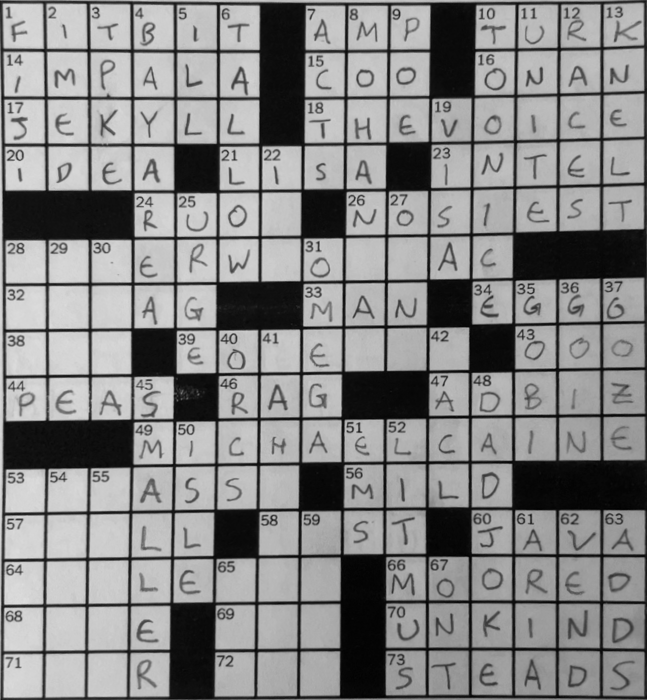

In [216]:
warped_cropped = ip.crop_grid(image)

util.showarray(warped_cropped)

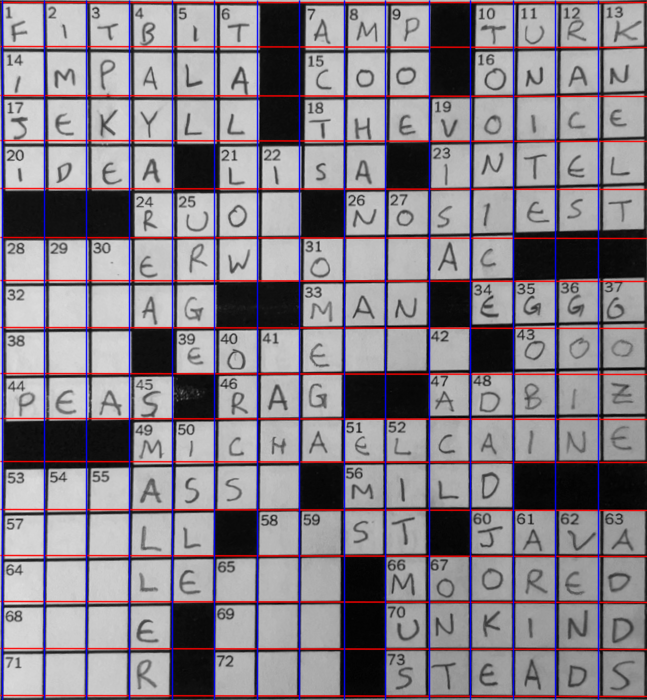

In [234]:
hlines,vlines,image_grid_lines = ip.__find_grid_lines(warped_cropped)

util.showarray(image_grid_lines,scale_factor=1)
#util.showarray(image_grid_lines,crop=(0,0,400,400), scale_factor=2)

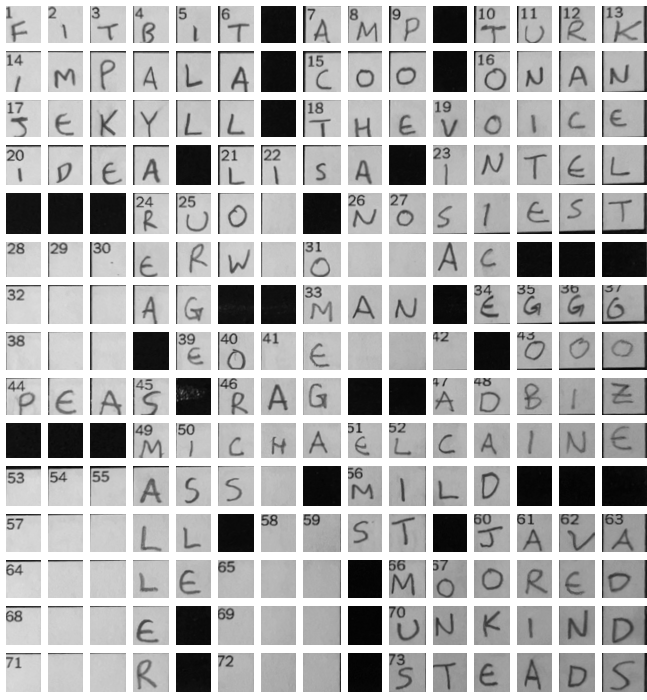

In [235]:
# remove grid lines before cropping
hlines,vlines,_ = ip.__find_grid_lines(warped_cropped)
image_removed_grid_lines = ip.__remove_grid_lines(hlines,vlines,warped_cropped)

util.showarray(image_removed_grid_lines)

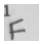

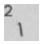

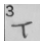

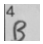

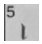

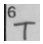

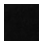

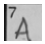

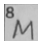

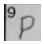

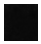

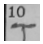

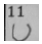

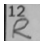

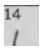

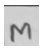

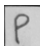

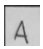

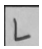

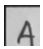

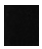

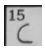

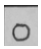

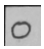

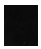

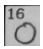

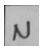

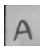

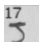

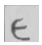

In [236]:
# Crop the cells
hlines,vlines,_ = ip.__find_grid_lines(warped_cropped)
    
cropped_cells = ip.__crop_cells(hlines,vlines,image_removed_grid_lines)

for cell in cropped_cells[:30]:
    util.showarray(cell)

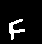

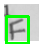

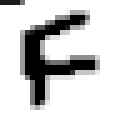

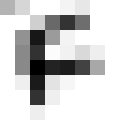

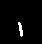

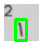

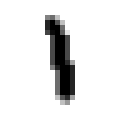

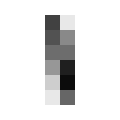

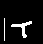

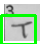

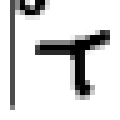

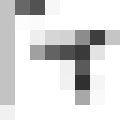

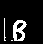

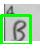

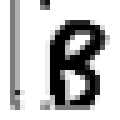

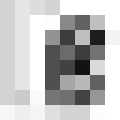

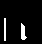

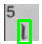

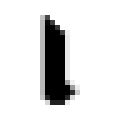

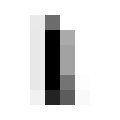

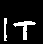

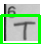

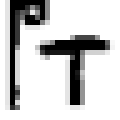

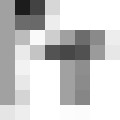

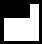

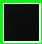

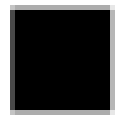

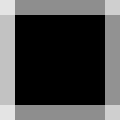

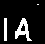

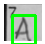

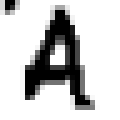

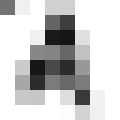

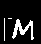

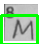

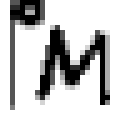

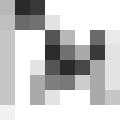

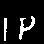

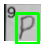

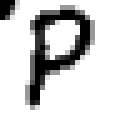

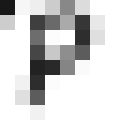

In [258]:
for cell in cropped_cells[:10]:
    found_bounding_box = ip.__find_letter_bounding_box(cell)
    util.showarray(found_bounding_box[1])
    util.showarray(found_bounding_box[2])
    
    cropped_letter = ip.__crop_letter(cell,found_bounding_box[0])
    util.showarray(cropped_letter,scale_factor=5)

    resized = cv2.resize(cropped_letter,(8,8),interpolation=cv2.INTER_AREA )
    util.showarray(resized,scale_factor=15)

In [259]:
# Crop out letters
cropped_letters = ip.crop_letters(warped_cropped)

for letter in cropped_letters:
    util.showarray(letter)